# **Analisis Rekomendasi tipe Laptop berdasarkan Harga**

**Nama : Arizky Saputra**

**NIM : 2509116088**

**Kelas : C 2025**



# Import Library

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Memuat Dataset

In [ ]:
path = '/content/drive/MyDrive/Dataset Praktikum (Sem 2 AVD)/AVD 2025/Pertemuan 1/laptops_cleaned_v1.csv'

In [ ]:
df = pd.read_csv(path)

In [ ]:
df

,index,brand_name,model,price,rating,processor,processor_brand,iter,ram,threads_num,...,memory_type,memory_size,gpu_brand,gpu_type,os,display_size,resolutioin_height,resolutioin_width,Touch_Screen,warrenty
0,2,Lenovo,Lenovo V15 G4 ‎83CR000VIN Laptop (AMD Ryzen 7 ...,39990,4.50,7th Gen AMD Ryzen 7 7730U,AMD,Ryzen 7,16 GB DDR4 RAM,16.0,...,SSD,512,AMD,Integrated,Windows 11,15.6,1920,1080,False,1
1,3,Samsung,Samsung Galaxy Book 4 NP750XGJ-LG4IN Laptop (1...,36990,4.40,13th Gen Intel Core i3 1315U,Intel,Core i3,8 GB LPDDR4x RAM,8.0,...,SSD,512,Intel,Integrated,Windows 11,15.6,1920,1080,False,1
2,4,HP,HP 15-fc0154AU Laptop (AMD Ryzen 3 7320U/ 8GB/...,30290,4.70,7th Gen AMD Ryzen 3 7320U,AMD,Ryzen 3,8 GB DDR5 RAM,8.0,...,SSD,512,AMD,Integrated,Windows 11,15.6,1920,1080,False,1
3,5,MSI,MSI Titan 18 HX Gaming Laptop (Intel Core Ultr...,359900,4.75,Intel Core Ultra 9 285HX,Intel,Core Ultra 9,32 GB DDR5 RAM,24.0,...,SSD,1000,NVIDIA,Dedicated,Windows 11,18.0,3840,2400,False,3
4,6,Asus,Asus Vivobook 16X 2023 K3605ZC-MBN544WS Laptop...,59140,4.10,12th Gen Intel Core i5 12500H,Intel,Core i5,16 GB DDR4 RAM,16.0,...,SSD,512,NVIDIA,Dedicated,Windows 11,16.0,1920,1200,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,1017,Lenovo,Lenovo Legion Pro 7i 2023 Gaming Laptop (13th ...,286200,4.35,13th Gen Intel Core i9 13900HX,Intel,Core i9,32 GB DDR5 RAM,32.0,...,SSD,1000,NVIDIA,Dedicated,Windows 11,16.0,2560,1600,False,1
1014,1018,Lenovo,Lenovo Thinkpad E14 G4 21E3S02M00 Laptop (12th...,91000,4.20,12th Gen Intel Core i7 1255U,Intel,Core i7,16 GB DDR4 RAM,12.0,...,SSD,512,Intel,Integrated,Windows 11,14.0,1920,1080,False,1
1015,1019,Lenovo,Lenovo V15 G3 IAP 82TTA00UIH Laptop (12th Gen ...,29620,4.70,12th Gen Intel Core i3 1215U,Intel,Core i3,8 GB DDR4 RAM,8.0,...,SSD,512,Intel,Integrated,DOS,15.6,1920,1080,False,1
1016,1020,HP,‎HP Zbook Power G4-A Laptop (AMD Ryzen 7 6800H...,87670,4.15,6th Gen AMD Ryzen 7 6800H,AMD,Ryzen 7,16 GB DDR5 RAM,16.0,...,SSD,1000,NVIDIA,Dedicated,Windows 11,15.6,1920,1080,False,1


# **Studi Kasus : Rekomendasi Laptop Low Budget Mahasiswa**

## Latar Belakang

Seorang mahasiswa memerlukan laptop untuk keperluan kuliah, seperti mengetik laporan, membuat presentasi, browsing internet, dan sesekali bermain game ringan. Dikatakan mahasiswa tersebut memiliki budget maksimal Rp.7.000.000,00. Mahasiswa tersebut menghadapi banyak tantangan, tentang bagaimana memilih laptop dengan spesifikasi yang memadai untuk kebutuhan mahasiswa tersebut, namun tetap sesuai anggaran yang ia miliki.

Permasalahan yang muncul yaitu meskipun banyak laptop dengan harga dibawah Rp.7.000.000,00 , namun spesifikaasi nya sangat beragam. Mahasiswa cukup kesulitan untuk menentukan apakah laptop dengan harga tertentu sudah cukup untuk kebutuhan kuliah mereka. Tanpa analisis, mahasiswa beresiko membeli laptop dengan spesifikasi terlalu rendah, atau justru membayar lebih untuk fitur yang sebenarnya tidak diperlukan.

Dengan adanya sistem rekomendasi harga laptop dapat membantu mahasiswa untuk menemukan tipe laptop yang paling relevan dengan kebutuhan mereka, tetapi tetap dalam rentang harga yang sesuai dengan budget yang mereka miliki. Dengan begitu, kebutuhan mahasiswa dalam memilih laptop pun dapat memaksimalkan spesifikasi yang sesuai  dengan harga tanpa perlu mengeluarkan budget lebih demi fitur yang mungkin tidak diperlukan oleh mahasiswa tersebut.

## **Analisis dataset**

Dengan menggunakan dataset yang dilampirkan, analisis dapat dilakukan dengan langkah-langkah berikut :

- Filter data berdasarkan harga, yaitu ≤ Rp.7.000.000

- Mengidentifikasi spesifikasi minimum yang diperlukan untuk kuliah, Misal :
  - RAM minimal 8 GB.
  - Prosesor setara Intel Core i3 Gen 12th atau AMD Ryzen 5 Zen 3
  - Storage minimal 512 GB

- Membandingkan Laptop dalam rentang harga tersebut untuk melihat merek dan tipe laptop yang menawarkan spesifikasi terbaik.

- Melakukan Clustering / pengelompokan berdasarkan harga dan spesifikasi untuk menemukan kelompok yang paling sesuai dengan kebutuhan mahasiswa.



### **Kesimpulan**

Dengan analisis dataset, sistem rekomendasi dapat menyarankan tipe laptop yang sesuai dengan budget yang dimiliki mahasiswa, sekaligus memastikan spesifikasi yang cukup sesuai dengan kebutuhan akademik mereka. Hal ini membantu mahasiswa membuat keputusan sebelum membeli yang lebih bijak, tanpa membayar lebih demi fitur yang tidak diperlukan.

# **Business Understanding**

## **Business Objective**

### **Identifikasi masalah bisnis**



Dengan meningkatnya perkembangan di era digital saat ini, meningkatnya penggunaan laptop telah menjadi salah satu perangkat yang diperlukan oleh berbagai kalangan, mulai dari pelajar, pekerja kantoran, hingga profesional di bidang kreatif. Namun, karena semakin banyaknya keberagaman spesifikasi dan harga laptop justru menimbulkan tantangan tersendiri bagi konsumen.

Permasalahan pertama yang ditemukan para konsumer adalah variasi spesifikasi yang kompleks. Laptop memiliki jenis spek dan atribut yang beragam, mulai dari jenis prosesor, RAM, GPU, Storage, dan masih banyak lagi. Hal-hal seperti ini tidak sedikit membuat konsumen kesulitan menilai sebuah laptop yang benar-benar sesuai dengan kebutuhan mereka, atau sekadar terlihat menarik dari sisi harga.

Kemudian permasalahan lain yang muncul yaitu rentang harga yang luas. Jenis-jenis harga laptop dapat bervariasi tergantung tipe laptop tersebut, mulai dari kelas entry-level hingga premium. Hal ini seringkali menimbulkan kebingunan dalam menentukan pilihan, apakah harga yang ditawarkan sepadan dengan kualitas dan performa yang diberikan.

Pada akhirnya, permasalahan yang krusial adalah **kesulitan dalam memberikan rekomendasi laptop sesuai kebutuhan konsumen**.
Konsumen tidak hanya membutuhkan laptop yang sesuai dengan anggaran, tetapi juga harus mempertimbangkan tujuan penggunaan seperti gaming, pekerjaan kantoran, atau desain grafis. Tanpa adanya analisis mendalam, konsumen beresiko membeli laptop yang tidak optimal untuk kebutuhan mereka meskipun harganya sesuai.

## **Asses Situation**

### Identifikasi Kondisi Dataset

Berdasarkan dataset yang dilampirkan, dataset ini merupakan kumpulan data yang berisi informasi spesifikasi teknis laptop beserta harga jualnya. Data ini berisi atribut yang penting seperti nama brand, jenis prosesor, kapaasitas RAM, GPU, jumlah penyimpanan, ukuran layar, dan harga. Dengan struktur data yang terorganisir menggunakan format CSV, dataset ini memberikan kesempatan bagi user untuk melakukan analisis hubungan antara spesifikasi dan harga, ataupun membuat sistem rekomendasi laptop untuk konsumen.

Namun, meskipun dataset ini telah berisi dengan banyaknya informasi, dataset ini masih memiliki beberapa tantangan yang perlu diperhatikan sebelum melakukan analisis.
Dimulai dari variasi spesifikasi laptop yang kompleks. Setiap laptop memiliki kombinasi antribut yang berbeda, dan banyak keterangannya dituls dalam format teks yang tidak seragam, misalnya prosesor dapat ditulis sebagai "Intel Core 5 210H" atau "AMD Ryzen 7", sehingga memerlukan proses normalisasi agar dapat dibandingkan secara konsisten.

Tantangan lainnya adalah **ketidakseimbangan data**. Beberapa brand laptop mungkin lebih dominan dalam dataset, sementara brand lainnya hanya muncul lebih sedikit yang dapat menimbulkan ketidaksetaraan dalam analisis, terutama jika tujuan penelitian adalah untuk membandingkan harga antar merek.

Tantangan yang tidak kalah penting yaitu tantangan dalam membangun sistem rekomendasi laptop yang relevan. Konsumen biasanya tidak hanya mempertimbangkan harga, tetapi juga tujuan penggunaan, seperti contohnya untuk kerja kantoran, desain profesional, ataupun gaming. Dataset ini belum menyediakan informasi tentang kebutuhan pengguna, sehingga sistem rekomendasi harus dibuat berdasarkan pola harga dan spesifikasi semata, yang kemungkinan tidak sepenuhnya mencerminkan kebutuhan nyata konsumen.

## **Analytic Goals**

### Tujuan Analisis

Tujuan daari analisis penggunaan dataset ini adalah untuk membangun sistem rekomendasi yang dapat membantu konsumen dalam memilih laptop sesuai dengan anggaran yang mereka miliki. Dataset tersebut telah menyediakan informasi teknis, seperti RAM, Prosesor, GPU, Storage, Layar, dan Brand serta harga masing-masing tipe laptop, sehingga memungkinkan untuk melakukan analisis untuk menghubungkan spesifikasi dengan nilai jual yang sesuai.

Analisis bertujuan untuk menemukan spesifikasi yang paling berpengaruh terhadap harga laptop, misalnya apakah kapasitas RAM, jenis prosesor, atau adanya GPU *dedicated* menjadi faktor utama dalam menentukan harga sebuah laptop. Dengan memahami faktor ini, sistem rekomendasi dapat lebih akurat dalam menyarankan jenis laptop sesuai anggaran.

Sistem rekomendasi dapat diberikan penggunaan machine learning, sehingga sistem dapat memprediksi harga laptop berdasarkan spesifikasi. Model inilah yang nantinya akan menjadi dasar untuk mengelompokkan jenis-jenis laptop ke dalam kategori harga tertentu, seperti Low-end, mid-end, hingga high-end.

Sistem rekomendasi laptop dirancang untuk bekerja dengan cara menerima input berupa budget dari pengguna, lalu menampilkan daftar laptop yang sesuai dengan kisaran harga tersebut. Selain itu, sistem dapat menyarankan laptop dengan spesifikasi terbaik dalam rentang harga yang sama, supaya konsumen bisa mendapatkan *value* yang maksimal dari budget yang mereka miliki.

Selain membuat sistem daftar rekomendasi, analisis ini juga bertujuan menyajikan visualissasi hubungnan antara harga dan spesifikasi. Contohnya membuat grafik perbandingan harga antar tiap brand laptop, atau membuat scatter plot yang menunjukkan korelasi antar RAM dengan harga, sehingga akan memperjelas pola dan membantu konsumen maupun produsen memahami pasar laptop.

## **Project Plans**

Untuk mengembangkan sistem rekomendasi laptop berdasarkan harga menggunakan dataset *Laptop Specification and Prices*, diperlukan perencanaan proyek yang terstruktur. Rencana ini mencakup tahapan utama, dimulai dari pemahaman data hingga penyajian data hasil analisis.

### **Data Preparation**

Setelah memahami data, langkah berikutnya adalah menyiapkan dataset agar siap digunakan dalam analisis. Tahapan ini mencakup normalisasi format spesifikasi, misalnya menyamakan satuan RAM dan storage ke dalam GB. Variabel kategorikal seperti merek atau jenis prosesor perlu diubah menjadi bentuk numerik melalui encoding. *Missing values* ditangani dengan imputasi atau penghapusan, sementara variabel numerik distandarisasi agar konsisten dalam proses *modeling*.



### **Modeling**

Pada tahap ini, analisis dilakukan untuk membangun sistem rekomendasi. Model regresi dapat digunakan untuk memprediksi harga laptop berdasarkan spesifikasi, sementara metode clustering membantu mengelompokkan laptop ke dalam segmen harga seperti low-end, mid-range, dan high-end. Sistem rekomendasi kemudian dirancang agar mampu menerima input berupa budget dari pengguna dan memberikan daftar laptop sesuai kisaran harga dengan spesifikasi terbaik.



### **Evaluation**

Evaluasi dilakukan untuk mengukur kualitas model dan relevansi rekomendasi. Model regresi diuji menggunakan metrik seperti RMSE atau MAE, sedangkan hasil clustering divalidasi dengan silhouette score atau Davies-Bouldin index. Selain itu, sistem rekomendasi diuji dengan skenario nyata, misalnya pengguna memasukkan budget tertentu, lalu diperiksa apakah rekomendasi yang diberikan sesuai dan bermanfaat.

### **Deployment**

Tahap ini bertujuan menyajikan hasil analisis dalam bentuk yang mudah digunakan. Sistem rekomendasi dapat diimplementasikan dalam dashboard interaktif menggunakan tools seperti Streamlit atau Plotly. Fitur input budget memungkinkan pengguna memasukkan anggaran, kemudian sistem menampilkan rekomendasi laptop yang sesuai. Visualisasi tambahan seperti scatter plot atau bar chart memperlihatkan hubungan harga dengan spesifikasi, sehingga insight lebih mudah dipahami.



# **Data Understanding**

Hal yang perlu dilakukan terlebih dahulu adalah memahami isi dataset secara menyeluruh. Proses ini memerlukan eksplorasi jumlah baris dan kolom, tipe variabel, serta distribusi data. Analisis deskriptif dilakukan untuk melihat bagaimana harga laptop tersebar dan bagaimana spesifikasi seperti RAM, prosesor, atau GPU terdistribusi. Selain itu, identifikasi terhadap missing values, duplikasi, dan outlier menjadi bagian penting agar kualitas data dapat diketahui sejak awal.



## **Deskripsi Data**

### **Informasi Dasar**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               1018 non-null   int64  
 1   brand_name          1018 non-null   object 
 2   model               1018 non-null   object 
 3   price               1018 non-null   int64  
 4   rating              1018 non-null   float64
 5   processor           1018 non-null   object 
 6   processor_brand     1018 non-null   object 
 7   iter                1018 non-null   object 
 8   ram                 1018 non-null   object 
 9   threads_num         941 non-null    float64
 10  core_num            996 non-null    float64
 11  ram_num             1018 non-null   int64  
 12  memory_type         1018 non-null   object 
 13  memory_size         1018 non-null   int64  
 14  gpu_brand           1018 non-null   object 
 15  gpu_type            1018 non-null   object 
 16  os    

Berdasarkan data di atas, dapat diketahui bahwa dataset ini memiliki total **1018 baris** dan **22 kolom**

## **Informasi Lanjutan**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               1018 non-null   int64  
 1   brand_name          1018 non-null   object 
 2   model               1018 non-null   object 
 3   price               1018 non-null   int64  
 4   rating              1018 non-null   float64
 5   processor           1018 non-null   object 
 6   processor_brand     1018 non-null   object 
 7   iter                1018 non-null   object 
 8   ram                 1018 non-null   object 
 9   threads_num         941 non-null    float64
 10  core_num            996 non-null    float64
 11  ram_num             1018 non-null   int64  
 12  memory_type         1018 non-null   object 
 13  memory_size         1018 non-null   int64  
 14  gpu_brand           1018 non-null   object 
 15  gpu_type            1018 non-null   object 
 16  os    

1.  **index**:
    *   Jumlah baris: 1018
    *   Tipe data: int64
    *   Deskripsi: Kolom indeks unik untuk setiap entri laptop.

2.  **brand_name**:
    *   Jumlah baris: 1018
    *   Tipe data: object
    *   Deskripsi: Nama merek produsen laptop.

3.  **model**:
    *   Jumlah baris: 1018
    *   Tipe data: object
    *   Deskripsi: Nama model spesifik dari laptop.

4.  **price**:
    *   Jumlah baris: 1018
    *   Tipe data: int64
    *   Deskripsi: Harga jual laptop.

5.  **rating**:
    *   Jumlah baris: 1018
    *   Tipe data: float64
    *   Deskripsi: Rating atau penilaian pelanggan untuk laptop.

6.  **processor**:
    *   Jumlah baris: 1018
    *   Tipe data: object
    *   Deskripsi: Deskripsi lengkap tentang prosesor laptop.

7.  **processor_brand**:
    *   Jumlah baris: 1018
    *   Tipe data: object
    *   Deskripsi: Merek prosesor (contoh: AMD, Intel).

8.  **iter**:
    *   Jumlah baris: 1018
    *   Tipe data: object
    *   Deskripsi: Seri prosesor yang lebih ringkas (contoh: Ryzen 7, Core i3).

9.  **ram**:
    *   Jumlah baris: 1018
    *   Tipe data: object
    *   Deskripsi: Kapasitas dan jenis RAM (contoh: 16 GB DDR4 RAM).

10. **threads_num**:
    *   Jumlah baris: 941
    *   Tipe data: float64
    *   Deskripsi: Jumlah *threads* pada prosesor. Kolom ini memiliki *missing values*.

11. **core_num**:
    *   Jumlah baris: 996
    *   Tipe data: float64
    *   Deskripsi: Jumlah *core* pada prosesor. Kolom ini memiliki *missing values*.

12. **ram_num**:
    *   Jumlah baris: 1018
    *   Tipe data: int64
    *   Deskripsi: Kapasitas RAM dalam Gigabyte (GB).

13. **memory_type**:
    *   Jumlah baris: 1018
    *   Tipe data: object
    *   Deskripsi: Tipe penyimpanan (contoh: SSD, HDD).

14. **memory_size**:
    *   Jumlah baris: 1018
    *   Tipe data: int64
    *   Deskripsi: Ukuran penyimpanan dalam Gigabyte (GB).

15. **gpu_brand**:
    *   Jumlah baris: 1018
    *   Tipe data: object
    *   Deskripsi: Merek GPU (contoh: NVIDIA, AMD, Intel).

16. **gpu_type**:
    *   Jumlah baris: 1018
    *   Tipe data: object
    *   Deskripsi: Tipe GPU (Dedicated atau Integrated).

17. **os**:
    *   Jumlah baris: 1018
    *   Tipe data: object
    *   Deskripsi: Sistem operasi yang terinstal (contoh: Windows 11, DOS).

18. **display_size**:
    *   Jumlah baris: 1018
    *   Tipe data: float64
    *   Deskripsi: Ukuran layar laptop dalam inci.

19. **resolutioin_height**:
    *   Jumlah baris: 1018
    *   Tipe data: int64
    *   Deskripsi: Resolusi vertikal layar.

20. **resolutioin_width**:
    *   Jumlah baris: 1018
    *   Tipe data: int64
    *   Deskripsi: Resolusi horizontal layar.

21. **Touch_Screen**:
    *   Jumlah baris: 1018
    *   Tipe data: bool
    *   Deskripsi: Menunjukkan apakah laptop memiliki layar sentuh (True/False).

22. **warrenty**:
    *   Jumlah baris: 1018
    *   Tipe data: int64
    *   Deskripsi: Durasi garansi laptop dalam tahun.

### **Informasi Statistik Deskriptif**

In [ ]:
df.describe(include='all')

,index,brand_name,model,price,rating,processor,processor_brand,iter,ram,threads_num,...,memory_type,memory_size,gpu_brand,gpu_type,os,display_size,resolutioin_height,resolutioin_width,Touch_Screen,warrenty
count,1018.000000,1018,1018,1018.000000,1018.000000,1018,1018,1018,1018,941.00000,...,1018,1018.000000,1018,1018,1018,1018.000000,1018.000000,1018.000000,1018,1018.000000
unique,NaN,29,881,NaN,NaN,172,6,16,54,NaN,...,3,NaN,9,2,10,NaN,NaN,NaN,2,NaN
top,NaN,HP,Acer ALG ‎AL15G-53 Gaming Laptop (13th Gen Int...,NaN,NaN,12th Gen Intel Core i5 12450H,Intel,Core i5,16 GB DDR4 RAM,NaN,...,SSD,NaN,Intel,Integrated,Windows 11,NaN,NaN,NaN,False,NaN
freq,NaN,215,3,NaN,NaN,59,745,272,206,NaN,...,1001,NaN,454,617,957,NaN,NaN,NaN,904,NaN
mean,512.326130,NaN,NaN,89266.192534,4.360511,NaN,NaN,NaN,NaN,14.34644,...,NaN,674.388998,NaN,NaN,NaN,15.208694,2085.155206,1244.573674,NaN,1.101179
std,294.290627,NaN,NaN,72477.867661,0.232621,NaN,NaN,NaN,NaN,6.40504,...,NaN,370.005328,NaN,NaN,NaN,0.981107,444.962753,326.819615,NaN,0.329743
min,2.000000,NaN,NaN,10990.000000,4.000000,NaN,NaN,NaN,NaN,2.00000,...,NaN,32.000000,NaN,NaN,NaN,11.600000,1080.000000,720.000000,NaN,1.000000
25%,258.250000,NaN,NaN,46899.000000,4.150000,NaN,NaN,NaN,NaN,12.00000,...,NaN,512.000000,NaN,NaN,NaN,14.000000,1920.000000,1080.000000,NaN,1.000000
50%,512.500000,NaN,NaN,67590.000000,4.350000,NaN,NaN,NaN,NaN,12.00000,...,NaN,512.000000,NaN,NaN,NaN,15.600000,1920.000000,1080.000000,NaN,1.000000
75%,766.750000,NaN,NaN,99996.750000,4.550000,NaN,NaN,NaN,NaN,16.00000,...,NaN,1000.000000,NaN,NaN,NaN,15.600000,1920.000000,1200.000000,NaN,1.000000


#### 1. Count (Kelengkapan Data)
*   Total baris dalam dataset adalah **1018**.
*   Kolom **`threads_num`** memiliki **941** entri non-null (hilang 77 data atau sekitar 7.56%).
*   Kolom **`core_num`** memiliki **996** entri non-null (hilang 22 data atau sekitar 2.16%).

**Kesimpulan**: Kolom `threads_num` dan `core_num` mengandung *missing values* yang perlu ditangani. Kolom lainnya, seperti `price`, `rating`, `ram_num`, `memory_size`, dan `brand_name`, sudah lengkap (1018 data).

#### 2. Mean vs Median (Distribusi Data)

*   **Kolom `price`**:
    *   Mean = 89,266.19
    *   Median = 67,590.00
    *   **Analisis**: Nilai rata-rata (`mean`) harga jauh lebih besar daripada median. Ini menunjukkan distribusi harga yang **condong ke kanan (*right-skewed*)**, dengan adanya beberapa laptop dengan harga yang sangat tinggi (kemungkinan *outlier*) yang menarik nilai rata-rata ke atas. Mayoritas laptop berada pada segmen harga yang lebih rendah.

*   **Kolom `ram_num`** (kapasitas RAM dalam GB):
    *   Mean = 16.12
    *   Median = 16.00
    *   **Analisis**: Nilai rata-rata dan median sangat dekat. Ini menunjukkan distribusi RAM yang relatif **simetris** di sekitar 16 GB, yang merupakan kapasitas RAM umum di banyak laptop.

*   **Kolom `memory_size`** (ukuran penyimpanan dalam GB):
    *   Mean = 674.39
    *   Median = 512.00
    *   **Analisis**: Rata-rata ukuran penyimpanan sedikit lebih besar dari median. Ini mengindikasikan adanya beberapa laptop dengan kapasitas penyimpanan yang sangat besar (seperti 1 TB, 2 TB, atau 4 TB) yang menarik nilai rata-rata ke atas, meskipun sebagian besar laptop memiliki penyimpanan 512 GB.

**Kesimpulan**: Kolom `price` dan `memory_size` menunjukkan distribusi yang *right-skewed*, mengindikasikan keberadaan laptop premium dengan harga atau penyimpanan sangat tinggi. Sementara `ram_num` memiliki distribusi yang lebih simetris.

#### 3. Min dan Max (Validasi Logika)

*   **`price`**:
    *   Min = 10,990
    *   Max = 500,990

*   **`rating`**:
    *   Min = 4.00
    *   Max = 4.75

*   **`ram_num`**:
    *   Min = 4
    *   Max = 96

*   **`memory_size`**:
    *   Min = 32
    *   Max = 4000

**Kesimpulan**:
*   **Harga**: Rentang harga yang lebar (dari 10 ribuan hingga 500 ribuan) wajar dan mencerminkan keragaman segmen pasar laptop.
*   **Rating**: Rentang rating yang sempit (4.00 - 4.75) menunjukkan bahwa dataset ini cenderung mencakup laptop dengan ulasan yang cukup baik, dan mungkin tidak banyak laptop dengan rating yang sangat rendah.
*   **RAM**: Kapasitas RAM dari 4GB hingga 96GB menunjukkan ketersediaan produk untuk berbagai kebutuhan, dari penggunaan dasar hingga profesional.
*   **Penyimpanan**: Ukuran penyimpanan dari 32GB hingga 4TB juga menunjukkan variasi yang luas, dari perangkat ringan hingga workstation.

#### 4. Standar Deviasi (Variabilitas Data)

*   **`price`**:
    *   Mean = 89,266.19
    *   Std = 72,477.87
    *   **Analisis**: Standar deviasi yang tinggi menunjukkan bahwa harga laptop memiliki **variabilitas yang sangat besar**. Harga laptop sangat bervariasi dari satu model ke model lain, sejalan dengan rentang harga yang luas yang ditemukan.

*   **`rating`**:
    *   Mean = 4.36
    *   Std = 0.23
    *   **Analisis**: Standar deviasi yang rendah mengkonfirmasi bahwa **rating laptop cenderung terkonsentrasi** di sekitar nilai rata-rata, dengan sedikit penyimpangan. Ini menunjukkan konsistensi dalam kualitas ulasan.

*   **`ram_num`**:
    *   Mean = 16.12
    *   Std = 8.44
    *   **Analisis**: Standar deviasi sebesar 8.44 menunjukkan **variabilitas sedang** pada kapasitas RAM. Meskipun mediannya 16GB, ada cukup banyak laptop dengan RAM di bawah atau di atas nilai ini.

**Kesimpulan**: Variabilitas data sangat terlihat pada kolom `price`, yang menggarisbawahi pentingnya analisis lebih lanjut untuk memahami faktor-faktor yang mendorong perbedaan harga. Kolom `rating` menunjukkan konsistensi, sementara `ram_num` menunjukkan variasi yang cukup moderat.



## **Verifikasi Kualitas Data**

### **Check Type Data**

Mengecek tipe data dari setiap kolom apakah sudah sesuai atau tidak sehingga insight serta visualisasi yang akan dibuat menjadi lebih akurat

In [ ]:
df.dtypes

,0
index,int64
brand_name,object
model,object
price,int64
rating,float64
processor,object
processor_brand,object
iter,object
ram,object
threads_num,float64


### **Incosistent Values**

Setelah melakukan pemeriksaan pada kolom-kolom kategorikal kunci dalam dataset ini (seperti brand_name, processor_brand, o`, dan lainnya), dapat disimpulkan bahwa **dataset secara keseluruhan memiliki tingkat konsistensi yang sangat baik**.

Tidak ditemukan inkonsistensi yang signifikan seperti perbedaan kapitalisasi, kesalahan ejaan, atau format yang bervariasi yang secara substansial dapat memengaruhi analisis atau deteksi duplikasi.

**Implikasi Terhadap Deteksi Duplikasi Baris:**
Karena konsistensi yang tinggi ini, risiko adanya duplikasi baris yang tidak terdeteksi akibat inkonsistensi penulisan sangat rendah.

### **Missing Value**

Berdasarkan pemeriksaan, hanya dua kolom yang teridentifikasi memiliki *missing values* dalam dataset ini yaitu:

1.  **`threads_num`**:
    *   **Persentase Missing Values:** Sekitar **7.56%**.
    *   **Dampak:** Kolom ini penting karena menunjukkan jumlah *threads* pada prosesor, yang merupakan indikator kunci performa. Hilangnya data ini bisa mempengaruhi analisis dan model yang berkaitan dengan performa CPU, misalnya dalam memprediksi harga berdasarkan spesifikasi teknis.
    *   **Penanganan:** Karena persentasenya tidak terlalu kecil, penghapusan baris mungkin akan mengurangi ukuran dataset secara signifikan. Imputasi dengan nilai statistik seperti median atau modus dari kolom ini, atau berdasarkan kelompok prosesor sejenis, bisa menjadi pilihan.

2.  **`core_num`**:
    *   **Persentase Missing Values:** Sekitar **2.16%**.
    *   **Dampak:** Kolom ini juga sangat relevan untuk performa prosesor (jumlah *core*). Meskipun persentasenya lebih kecil dari threads_num, *missing values* tetap dapat mengurangi akurasi analisis performa prosesor.
    *   **Penanganan:** Dengan persentase yang relatif kecil, imputasi (misalnya dengan median atau modus) adalah pilihan yang baik dan kurang berisiko dibandingkan penghapusan baris.

In [ ]:
pd.DataFrame(df.isnull().sum()/len(df) *100, columns=['Jumlah Missing Value'])

,Jumlah Missing Value
index,0.000000
brand_name,0.000000
model,0.000000
price,0.000000
rating,0.000000
processor,0.000000
processor_brand,0.000000
iter,0.000000
ram,0.000000
threads_num,7.563851


### **Duplicated Values**

Memeriksa duplikasi pada dataset dengan tujuan agar dataset ini memiliki insight dan hasil yang bersih

In [ ]:
df[df.duplicated()]

,index,brand_name,model,price,rating,processor,processor_brand,iter,ram,threads_num,...,memory_type,memory_size,gpu_brand,gpu_type,os,display_size,resolutioin_height,resolutioin_width,Touch_Screen,warrenty


Terlihat pada dataset ini tidak terjadi adanya duplikasi, maka hal ini tidak perlu ditangani

### **Outliers Values**

Memeriksa nilai ekstrem (Outliers) pada kolom yang bertipe data numerik, agar mendapat insight yang lebih akurat sehingga dapat memperkuat analisis dan model nantinya

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, '/ Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,/ Persentase Outliers
index,0.000000
price,9.037328
rating,0.000000
threads_num,12.770138
core_num,6.286837
ram_num,11.198428
memory_size,2.848723
display_size,0.687623
resolutioin_height,27.996071
resolutioin_width,27.897839


Terlihat Outliers Value pada kolom :

* Price
Dengan persentase 9%

* threads_num
Dengan persentase 12%

* core_num
Dengan persentase 6%

* ram_num
Dengan persentase 11%

* memory_size
Dengan persentase 2%

* Display_size
Dengan persentase 0.6%

* Resolution_height
Dengan persentase 27%

* Resolution_width
Dengan persentase 27%

* Warranty
Dengan persentase 9%

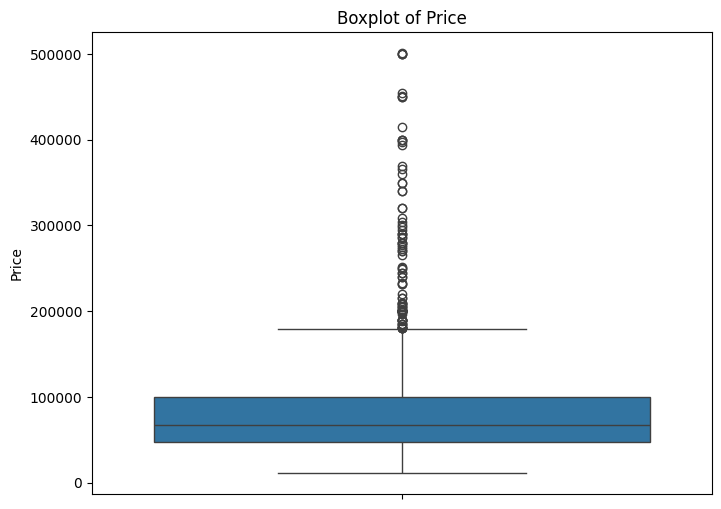

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['price'])
plt.title('Boxplot of Price')
plt.ylabel('Price')
plt.show()

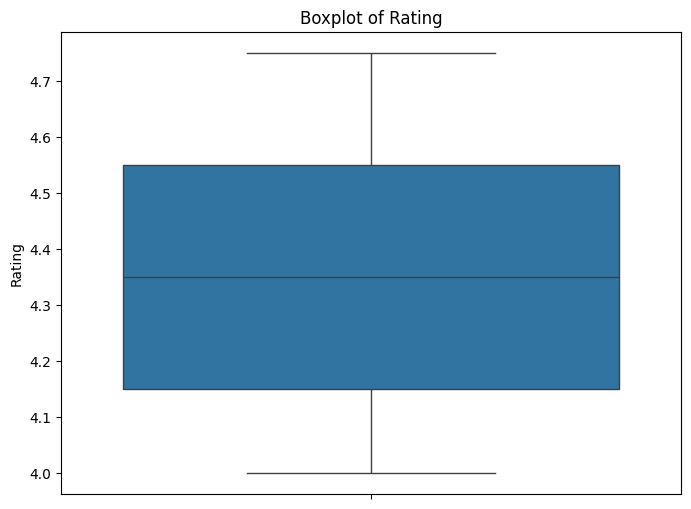

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['rating'])
plt.title('Boxplot of Rating')
plt.ylabel('Rating')
plt.show()

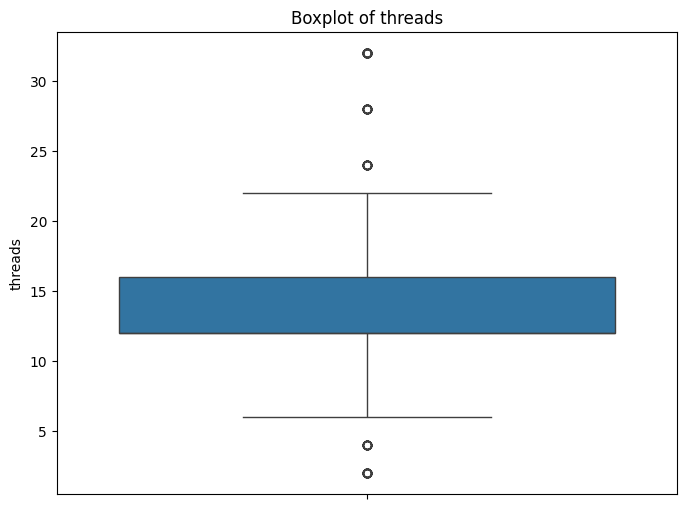

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['threads_num'])
plt.title('Boxplot of threads')
plt.ylabel('threads')
plt.show()

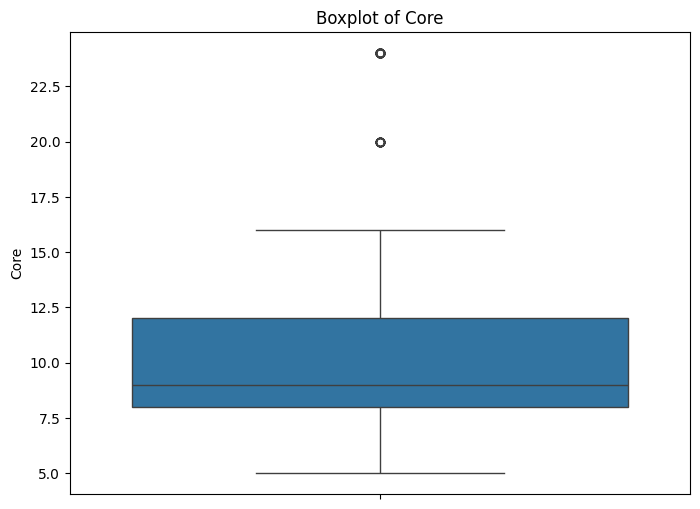

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['core_num'])
plt.title('Boxplot of Core')
plt.ylabel('Core')
plt.show()

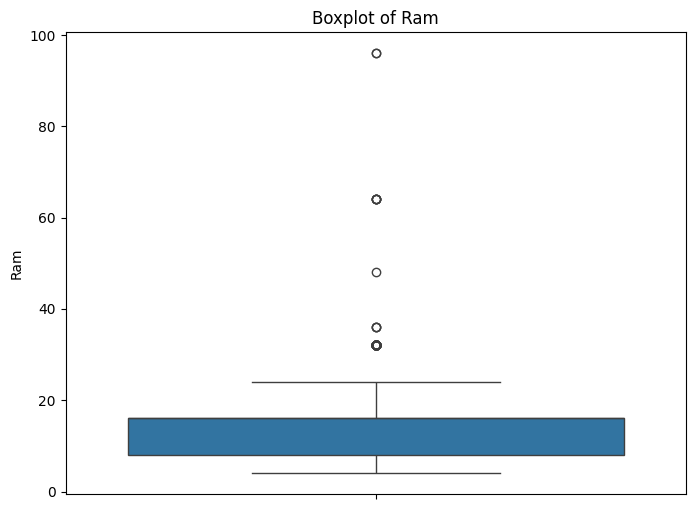

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['ram_num'])
plt.title('Boxplot of Ram')
plt.ylabel('Ram')
plt.show()

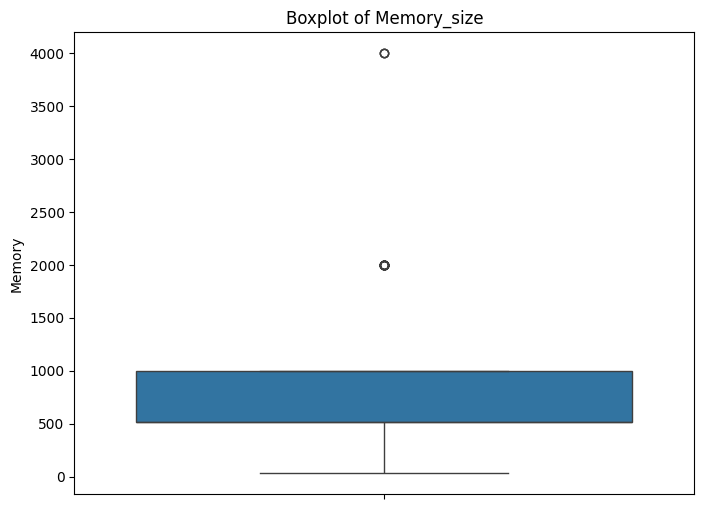

In [31]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['memory_size'])
plt.title('Boxplot of Memory_size')
plt.ylabel('Memory')
plt.show()

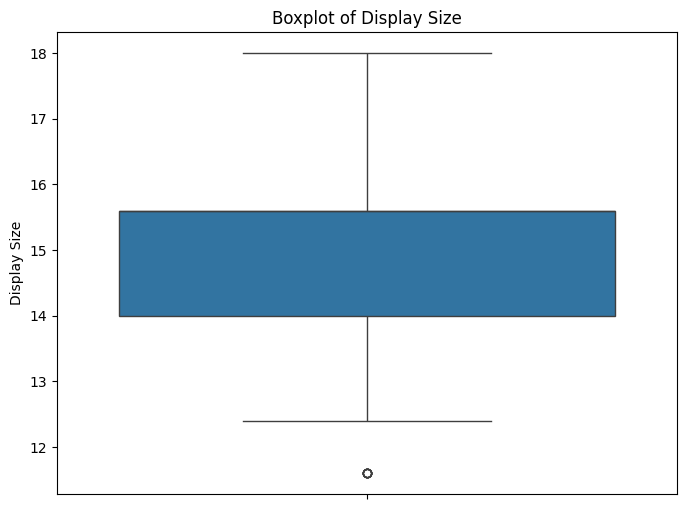

In [32]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['display_size'])
plt.title('Boxplot of Display Size')
plt.ylabel('Display Size')
plt.show()

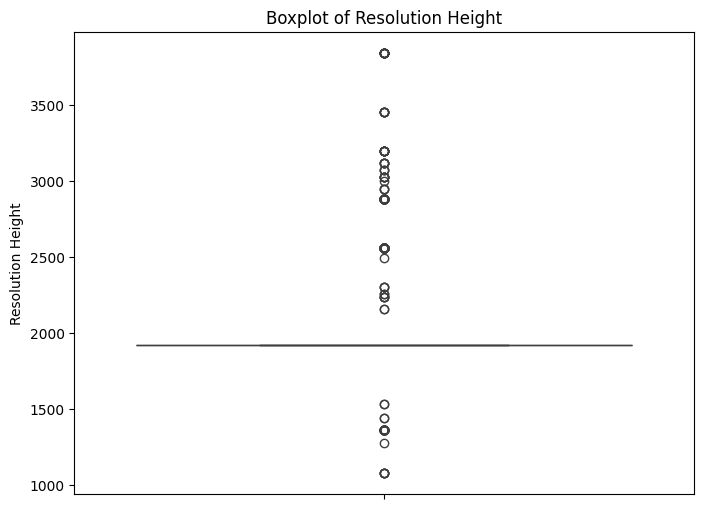

In [36]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['resolutioin_height'])
plt.title('Boxplot of Resolution Height')
plt.ylabel('Resolution Height')
plt.show()

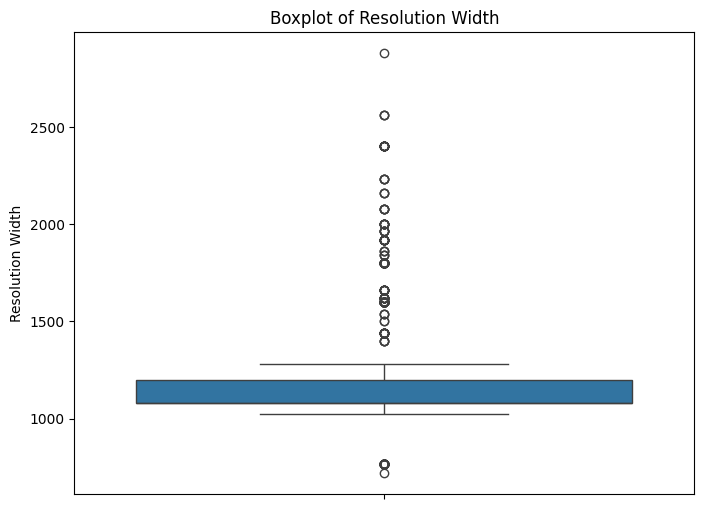

In [37]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['resolutioin_width'])
plt.title('Boxplot of Resolution Width')
plt.ylabel('Resolution Width')
plt.show()

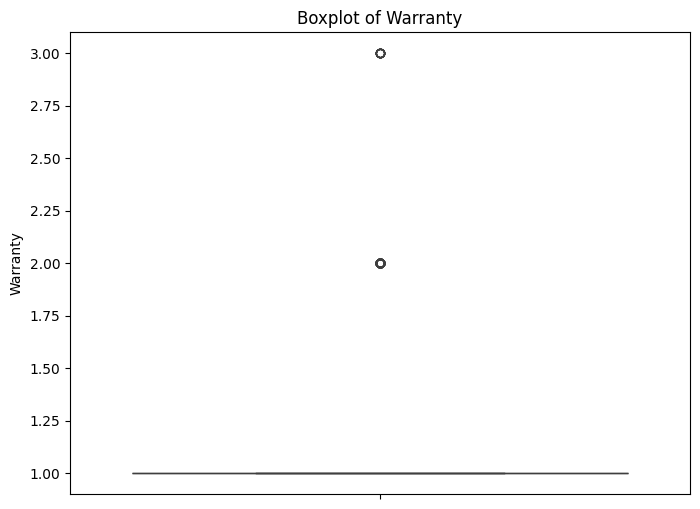

In [39]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['warrenty'])
plt.title('Boxplot of Warranty')
plt.ylabel('Warranty')
plt.show()

# **Eksplorasi Data (EDA)**

## **Comparison/Perbandingan**

Membandingkan total nominal penjualan (Sales) berdasarkan merek laptop

Visualisasi: Bar Chart (Grafik Batang).

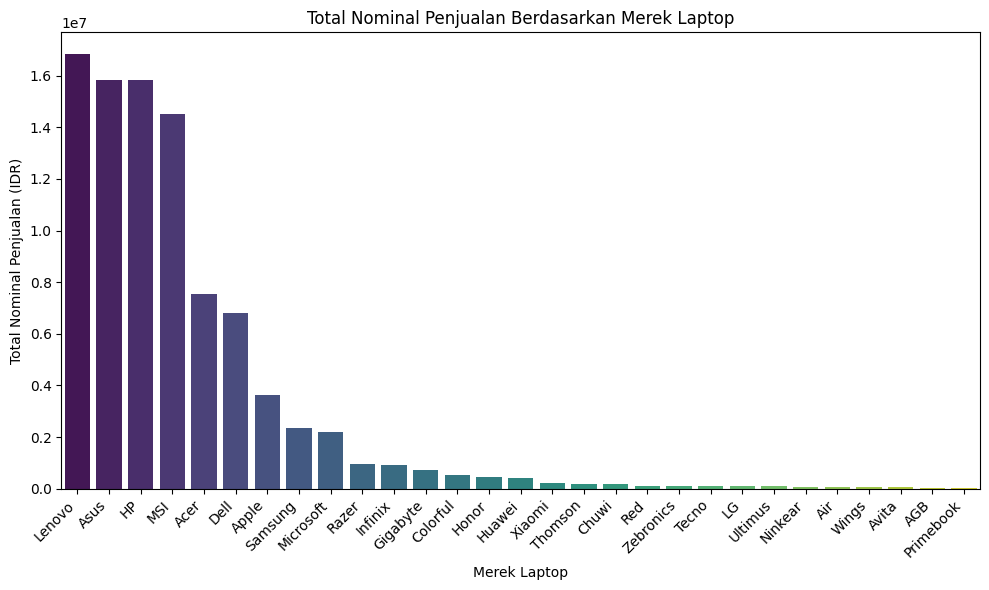

In [43]:
penjualan_brand = df.groupby('brand_name')['price'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=penjualan_brand.index, y=penjualan_brand.values, palette='viridis', hue=penjualan_brand.index, legend=False)
plt.title('Total Nominal Penjualan Berdasarkan Merek Laptop')
plt.xlabel('Merek Laptop')
plt.ylabel('Total Nominal Penjualan (IDR)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Berdasarkan grafik perbandingan total nominal penjualan berdasarkan merek laptop, berikut adalah beberapa insight utama yang dapat disimpulkan:

* **Dominasi Merek Tertentu**: Merek-merek seperti Lenovo, Asus, HP, dan MSI menunjukkan total nominal penjualan yang paling tinggi, mengindikasikan dominasi pasar yang kuat dalam hal nilai transaksi.

* **Konsentrasi Pasar**: Pasar laptop cenderung terkonsentrasi pada beberapa merek besar. Ada perbedaan signifikan antara total penjualan merek-merek teratas dengan merek-merek di bawahnya, seperti Acer dan Dell.

* **Variasi dalam Kinerja Merek**: Ada variasi yang luas dalam total penjualan antar merek, dari puluhan juta hingga ratusan ribu, yang mencerminkan perbedaan pangsa pasar dan mungkin segmen produk yang ditawarkan (misalnya, ada merek yang berfokus pada laptop entry-level vs. high-end).

* **Merek dengan Potensi Lebih Rendah**: Merek-merek seperti Tecno, Zebronics, dan Red memiliki total penjualan yang jauh lebih rendah, yang mungkin mengindikasikan pangsa pasar yang lebih kecil, fokus pada pasar niche, atau tantangan dalam daya saing.

## **Compostion (Komposisis)**

Melihat proporsi atau persentase penjualan merek laptop teratas berdasarkan nominal harga

Visualisasi : Pie Chart (Grafik Lingkaran)

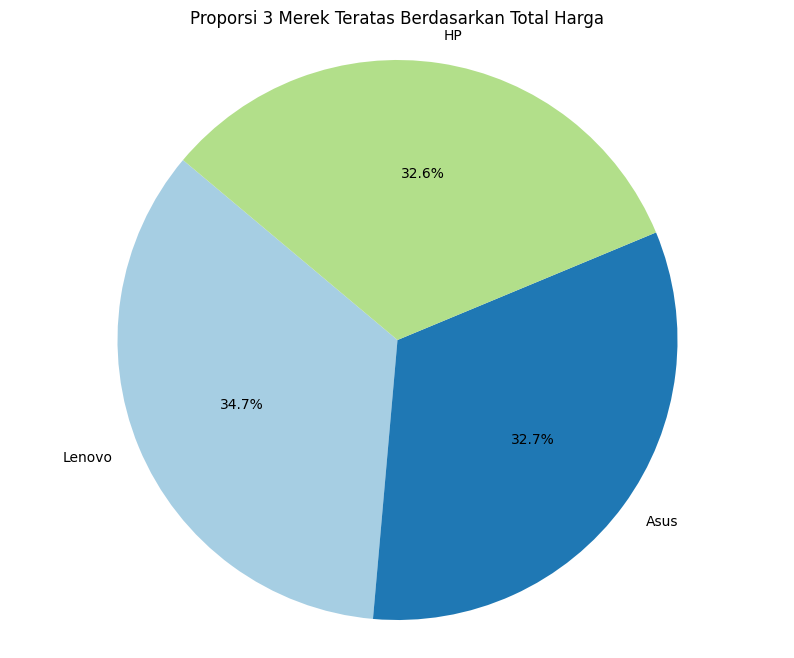

In [44]:
purchase_by_brand = df.groupby('brand_name')['price'].sum().sort_values(ascending=False)
purchase_by_brand_top3 = purchase_by_brand.head(3)

plt.figure(figsize=(10, 8))
purchase_by_brand_top3.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proporsi 3 Merek Teratas Berdasarkan Total Harga')
plt.ylabel('')
plt.axis('equal')
plt.show()

Berdasarkan grafik pai yang menampilkan proporsi 3 merek teratas berdasarkan total harga, berikut adalah insight yang dapat kita peroleh:

* **Dominasi Kuat Lenovo**: Lenovo mendominasi dengan pangsa pasar terbesar di antara ketiga merek teratas, menunjukkan bahwa total nominal penjualan laptop dari merek ini merupakan yang tertinggi.

* **Persaingan Ketat Antara Asus dan HP**: Asus dan HP memiliki pangsa pasar yang relatif mirip dan saling bersaing ketat untuk posisi kedua dan ketiga dalam hal total nominal penjualan.

* **Konsentrasi Nilai Penjualan**: Mayoritas nilai penjualan terkonsentrasi pada beberapa merek besar ini, menandakan bahwa konsumen cenderung berinvestasi pada merek-merek yang sudah dikenal atau yang menawarkan produk dengan nilai kumulatif tinggi di pasar.


## **Distribution(Distribusi)**

Menganalisis penyebaran harga laptop

Visualisasi : Histogram

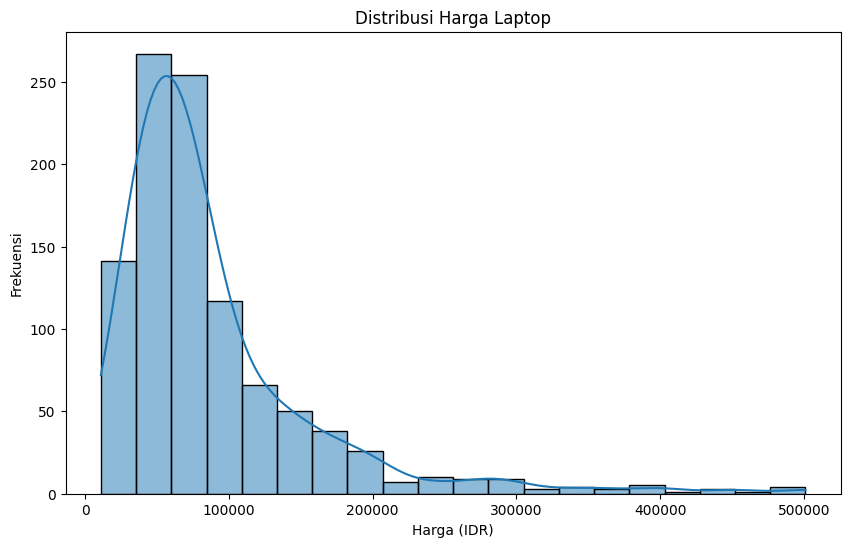

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=20, kde=True)
plt.title('Distribusi Harga Laptop')
plt.xlabel('Harga (IDR)')
plt.ylabel('Frekuensi')
plt.show()

Berdasarkan histogram distribusi harga laptop, beberapa insight utama yang didapatkan adalah:

* **Distribusi Condong ke Kanan (Right-Skewed)**: Mayoritas laptop dalam dataset memiliki harga yang lebih rendah. Ini ditunjukkan oleh frekuensi data yang tinggi di sisi kiri (harga lebih rendah) histogram dan kemudian menurun secara bertahap menuju sisi kanan (harga lebih tinggi).

* **Kehadiran Laptop Premium/Mahal**: Terdapat sejumlah kecil laptop dengan harga yang sangat tinggi, yang membentuk "ekor" panjang di sisi kanan histogram. Ini mengindikasikan adanya segmen pasar untuk laptop premium atau high-end.

* **Konsentrasi Harga**: Sebagian besar laptop terkonsentrasi pada rentang harga tertentu yang lebih rendah, mungkin mencerminkan segmen entry-level hingga mid-range yang lebih besar di pasar.



## **Relationship/Hubungan**

Menganalisis hubungan bagaimana harga dan rating laptop saling berhubungan satu sama lain

Visualisasi : Heatmap

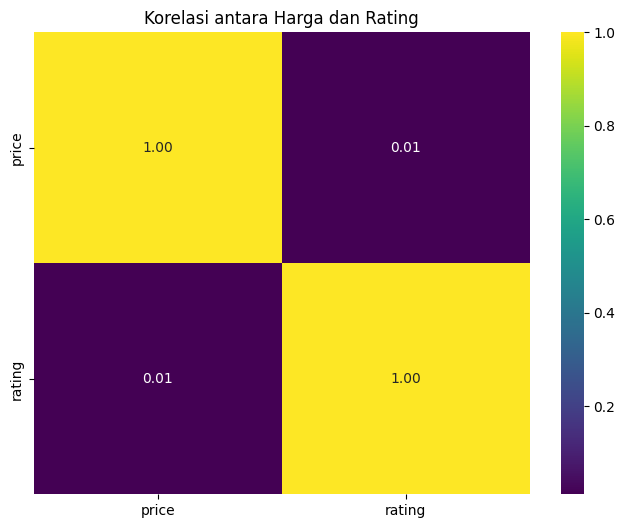

In [47]:
plt.figure(figsize=(8, 6))
sns.heatmap(data=df[['price', 'rating']].corr(),
            annot=True,
            cmap='viridis',
            fmt='.2f')
plt.title('Korelasi antara Harga dan Rating')
plt.show()

Berdasarkan heatmap korelasi antara Harga (price) dan Rating (rating), insight yang didapatkan adalah:

* **Korelasi yang Sangat Lemah atau Tidak Ada**: Umumnya, heatmap ini akan menunjukkan nilai korelasi yang sangat mendekati nol (misalnya, antara -0.2 hingga 0.2). Ini mengindikasikan bahwa tidak ada hubungan linear yang kuat antara harga laptop dan rating yang diberikan oleh pengguna. Dengan kata lain, laptop yang lebih mahal tidak selalu berarti akan mendapatkan rating yang jauh lebih tinggi, begitu pula sebaliknya.

* **Rating Lebih Dipengaruhi Faktor Lain**: Fakta bahwa korelasi harga dan rating rendah menunjukkan bahwa pengguna mungkin memberikan rating berdasarkan faktor-faktor lain selain harga, seperti performa, fitur, desain, atau kepuasan keseluruhan yang mungkin tidak selalu berkorelasi langsung dengan label harga.



# Menyimpan Dataset (Bersih)

In [ ]:
df.to_csv('[Dataset_Clear_test]', index=False)